In [1]:
import geopandas as gpd
import pandas as pd
import plotly.express as px
import json
import pathlib
import plotly.io as pio
pio.renderers.default = 'chrome'
import pyproj

In [2]:
local_authority_map = "/Users/apple/Desktop/Local_Authority_Districts_(December_2021)_GB_BFC/LAD_DEC_2021_GB_BFC.shp"

In [3]:
clean_data = pd.read_csv("/Users/apple/Desktop/data_clean.csv", dtype={"AreaCode": str})

In [4]:
clean_data = clean_data.rename({'AreaCode': 'LAD21CD'}, axis = 'columns')
clean_data = clean_data[['RegionName', 'LAD21CD', 'AvgDifference']]

In [5]:
clean_data.head()

RegionName    LAD21CD  AvgDifference
0  Aberdeenshire  S12000034   10112.978403
1           Adur  E07000223   15627.505025
2      Allerdale  E07000026    7402.460927
3   Amber Valley  E07000032    7932.019290
4          Angus  S12000041    8785.511378

In [6]:
shp_f = gpd.read_file(local_authority_map)

In [7]:
type(shp_f)

geopandas.geodataframe.GeoDataFrame

In [8]:
shp_f.tail()

OBJECTID    LAD21CD         LAD21NM        LAD21NMW   BNG_E   BNG_N  \
358       359  W06000020         Torfaen         Torfaen  327459  200480   
359       360  W06000021   Monmouthshire       Sir Fynwy  337812  209231   
360       361  W06000022         Newport       Casnewydd  337897  187432   
361       362  W06000023           Powys           Powys  302329  273255   
362       363  W06000024  Merthyr Tydfil  Merthyr Tudful  305916  206424   

        LONG        LAT                                GlobalID  \
358 -3.05101  51.698360  {5236D7C9-0915-4B85-892F-E20C75A88AF6}   
359 -2.90280  51.778271  {DE1A5DCB-A91E-40BF-B3B3-3E13EED9203F}   
360 -2.89769  51.582310  {A1AE351C-86E5-4CD8-9A76-88563A52C817}   
361 -3.43531  52.348640  {5CB7E231-AD03-40D5-9F64-1E0FBEB6DB4B}   
362 -3.36425  51.748581  {36B84B56-AE19-4824-BA04-1BDE550BB313}   

        SHAPE_Leng    SHAPE_Area  \
358   82544.770980  1.262399e+08   
359  224917.242781  8.503266e+08   
360  153216.300044  1.904311e+08   
361  610121.315603  5.195311e+09   
362   66696.815445  1.119570e+08   

                                              geometry  
358  POLYGON ((323898.201 211287.499, 324115.698 21...  
359  MULTIPOLYGON (((345897.698 180999.599, 345884....  
360  MULTIPOLYGON (((334186.001 192669.398, 334201....  
361  MULTIPOLYGON (((270499.000 297829.350, 270658....  
362  POLYGON ((303435.502 214925.598, 303431.602 21...

In [9]:
shp_f = shp_f[['LAD21CD', 'geometry']]

In [10]:
shp_f.tail()

LAD21CD                                           geometry
358  W06000020  POLYGON ((323898.201 211287.499, 324115.698 21...
359  W06000021  MULTIPOLYGON (((345897.698 180999.599, 345884....
360  W06000022  MULTIPOLYGON (((334186.001 192669.398, 334201....
361  W06000023  MULTIPOLYGON (((270499.000 297829.350, 270658....
362  W06000024  POLYGON ((303435.502 214925.598, 303431.602 21...

In [11]:
import matplotlib.pyplot as plt

<AxesSubplot:>

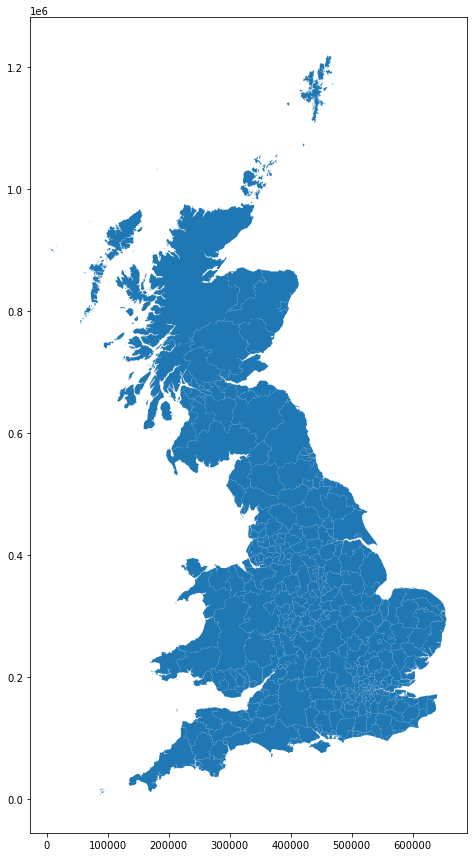

In [12]:
fig,ax = plt.subplots(figsize=(20, 15))
shp_f.plot(ax =ax)

In [13]:
merged = shp_f.merge(clean_data, how='left', left_on="LAD21CD", right_on="LAD21CD")
merged = merged[['RegionName','LAD21CD', 'geometry', 'AvgDifference']]
merged.head()

RegionName    LAD21CD  \
0            Hartlepool  E06000001   
1         Middlesbrough  E06000002   
2  Redcar and Cleveland  E06000003   
3      Stockton-on-Tees  E06000004   
4            Darlington  E06000005   

                                            geometry  AvgDifference  
0  MULTIPOLYGON (((450154.599 525938.201, 450140....    6844.203778  
1  MULTIPOLYGON (((446854.700 517192.700, 446854....    5888.934990  
2  MULTIPOLYGON (((451747.397 520561.100, 451792....    6422.807066  
3  MULTIPOLYGON (((447177.704 517811.797, 447176....    5444.951687  
4  POLYGON ((423496.602 524724.299, 423497.204 52...    6139.311928

In [14]:
shp_f2 = gpd.read_file(local_authority_map)
shp_f2 = shp_f2[['LAD21CD', 'geometry']]
merged2 = pd.merge(shp_f2, clean_data)
merged2 = merged2.dropna()
clean_data2 = merged2[['LAD21CD', 'RegionName', 'AvgDifference']]
shp_f2 = merged2[['LAD21CD', 'geometry']]

In [15]:
merged2.to_file('main_uk_map1.geojson', driver='GeoJSON')

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [16]:
with open ("main_uk_map1.geojson", 'r') as infile:
    pacitiesjson = json.load(infile)

In [17]:
pacitiesjson['features'][0]

{'type': 'Feature',
 'properties': {'LAD21CD': 'E06000001',
  'RegionName': 'Hartlepool',
  'AvgDifference': 6844.203778148148},
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[450154.59949999955, 525938.2011999991],
     [450140.3121999996, 525924.8535999991],
     [450143.0, 525930.3000000007],
     [450150.0, 525938.8000000007],
     [450158.0, 525944.1999999993],
     [450164.26499999966, 525944.7221000008],
     [450156.80090000015, 525940.2006000001],
     [450154.59949999955, 525938.2011999991]]],
   [[[447213.8995000003, 537036.1044999994],
     [447228.7982999999, 537033.3951999992],
     [447233.6958999997, 537035.1046999991],
     [447243.20249999966, 537047.6011999995],
     [447246.0965, 537052.5997000001],
     [447255.9988000002, 537102.1954999994],
     [447259.09889999963, 537108.8036000002],
     [447263.60080000013, 537113.8022000007],
     [447266.1979, 537115.6017000005],
     [447273.19799999986, 537118.6008000001],
     [447280.70100000035, 537120.1004

In [18]:
test = gpd.read_file('/Users/apple/Desktop/main_uk_map1.geojson')

In [19]:
test.to_crs(4326, inplace=True)
test.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [20]:
test

LAD21CD            RegionName  AvgDifference  \
0    E06000001            Hartlepool    6844.203778   
1    E06000002         Middlesbrough    5888.934990   
2    E06000003  Redcar and Cleveland    6422.807066   
3    E06000004      Stockton-on-Tees    5444.951687   
4    E06000005            Darlington    6139.311928   
..         ...                   ...            ...   
357  W06000020               Torfaen    6779.255103   
358  W06000021         Monmouthshire   13403.942601   
359  W06000022               Newport    8948.607210   
360  W06000023                 Powys    9236.642300   
361  W06000024        Merthyr Tydfil    5696.191944   

                                              geometry  
0    MULTIPOLYGON (((-1.22469 54.62610, -1.22491 54...  
1    MULTIPOLYGON (((-1.27719 54.54783, -1.27719 54...  
2    MULTIPOLYGON (((-1.20097 54.57762, -1.20029 54...  
3    MULTIPOLYGON (((-1.27209 54.55336, -1.27211 54...  
4    POLYGON ((-1.63767 54.61713, -1.63766 54.61669...  
..                                                 ...  
357  POLYGON ((-3.10489 51.79504, -3.10171 51.79372...  
358  MULTIPOLYGON (((-2.78124 51.52530, -2.78142 51...  
359  MULTIPOLYGON (((-2.95222 51.62897, -2.95199 51...  
360  MULTIPOLYGON (((-3.91190 52.56284, -3.90951 52...  
361  POLYGON ((-3.40253 51.82458, -3.40259 51.82455...  

[362 rows x 4 columns]

In [21]:
test.set_index('LAD21CD', inplace=True)

In [22]:
fig_test = px.choropleth_mapbox(test, 
                               locations = test.index,
                                geojson = test['geometry'],
                               color = 'AvgDifference',
                               hover_name = 'RegionName',
                               range_color=(clean_data2.AvgDifference.describe()[1] - clean_data2.AvgDifference.describe()[2], clean_data2.AvgDifference.describe()[1] + clean_data2.AvgDifference.describe()[2]),
                               mapbox_style = 'carto-positron',
                               color_continuous_scale = 'viridis',
                               zoom=6, center ={"lat":51.698360 , "lon": -3.05101},
                               opacity= 0.5)
fig_test.update_geos(fitbounds="locations", visible=False)
fig_test.show()